# <h1><center>Koroplet (Choropleth) Haritalar</center></h1>

Bir koroplet haritası, bir dizi önceden tanımlanmış alanın, bir istatistiksel değişkenle orantılı olarak renklendirildiği veya desenlendiği bir tematik harita türüdür.


<img src='https://preview.anychart.com/pg/geodata-2.1.0-countries-turkey.png'></img>

In [1]:
#!pip install geopandas
#!pip install mapclassify
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
malmo_mahalle = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/Geopandas Data Visualisation/malmo-pop.shp")
malmo_mahalle.head()

,fid,Deso,Age_5,Age6_9,Age10_15,Age16_19,Age20_24,Age25_29,Age30_34,Age35_39,Age40_44,Age45_49,Age50_54,Age55_59,Age60_64,Age65_69,Age70_74,Age75_79,Age80_w,Total,geometry
0,2822.0,1280C1590,125.0,82.0,113.0,83.0,80.0,104.0,99.0,109.0,103.0,99.0,115.0,88.0,93.0,101.0,112.0,141.0,410.0,2057.0,"POLYGON ((373380.287 6160661.365, 373382.480 6..."
1,2823.0,1280C1430,332.0,201.0,262.0,141.0,165.0,217.0,212.0,195.0,168.0,140.0,139.0,140.0,101.0,75.0,54.0,39.0,35.0,2616.0,"POLYGON ((372667.079 6159991.971, 372653.152 6..."
2,2824.0,1280C1220,128.0,69.0,65.0,34.0,93.0,132.0,135.0,109.0,82.0,71.0,91.0,91.0,119.0,153.0,110.0,92.0,122.0,1696.0,"POLYGON ((372812.733 6158498.565, 372817.194 6..."
3,2825.0,1280C1490,76.0,70.0,118.0,92.0,102.0,57.0,48.0,89.0,87.0,108.0,101.0,94.0,80.0,59.0,62.0,35.0,62.0,1340.0,"POLYGON ((374168.622 6160181.233, 374169.100 6..."
4,2826.0,1280C1530,220.0,94.0,118.0,74.0,150.0,200.0,196.0,163.0,135.0,113.0,81.0,107.0,92.0,77.0,45.0,31.0,32.0,1928.0,"POLYGON ((375219.802 6160462.505, 375274.357 6..."


In [3]:
# Veri setinin sütunlarını inceleyelim. 
malmo_mahalle.columns

Index(['fid', 'Deso', 'Age_5', 'Age6_9', 'Age10_15', 'Age16_19', 'Age20_24',
       'Age25_29', 'Age30_34', 'Age35_39', 'Age40_44', 'Age45_49', 'Age50_54',
       'Age55_59', 'Age60_64', 'Age65_69', 'Age70_74', 'Age75_79', 'Age80_w',
       'Total', 'geometry'],
      dtype='object')

Geopandas plot fonksiyonu ile tek bir sütunun çizimini yapabiliriz. Şayet bu sütun sayısal veriler içeriyorsa, Geopandas otomatik olarak bu verileri belirli bir renk skalasına göre dizer ve görselleştirir. Nüfus veri setinde, her mahalledeki 80 yaş ve üstü nüfusu görselleştirelim. 

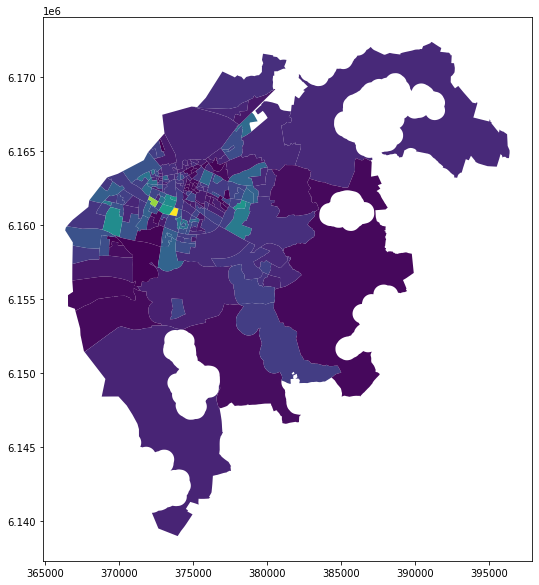

In [4]:
malmo_mahalle.plot(column='Age80_w', figsize=(12,10));

Üstteki veri setinin otomatik olarak renklendirilmesinde bir ölçeklendirme sorunu vardır. Bu da, çoğu mahallenin hemen hemen aynı veriye sahip olmasından kaynaklanır. Sütundaki verileri ölçeklendirmek için `scheme` argümanı kullanılır.

Bu sınıflandırma çalışması için mapclassify kütüphanesini kullanmaktayız. 


Bu argüman, standart sapma (`std_mean`), dağılım dilimi (`quantiles`), yüzdelik dağılım (`percentiles`), eşit ağırlıklı (`equal_interval`) gibi ölçeklendirme çeşitleri alabilir. Kullanıcı tanımlı bir ölçeklendirme için de, dilimlerin belirtildiği bir sözlük kullanılabilir.

`k` argümanı ile de veri setini kaç dilime böleceğimizi belirtmekteyiz. 

`cmap` argümanı ise, bir renk skalası belirler. 

`legend = True` argümanını kullanarak, harita kullanılan renklerin karşılığı olan sayısal değerleri görebilmekteyiz. 

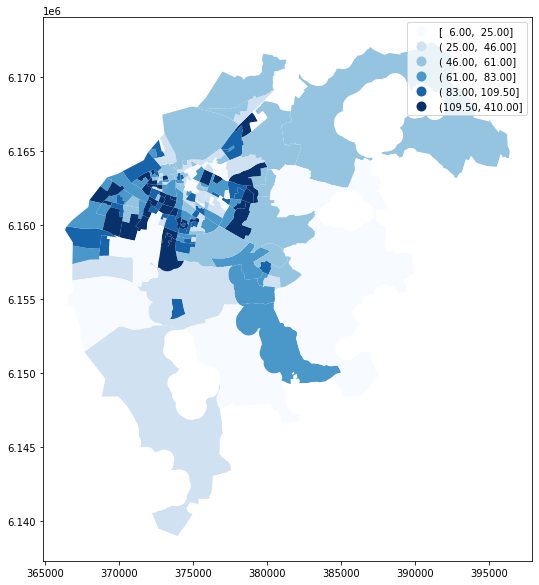

In [5]:
fig, ax = plt.subplots(figsize=(12,10))
malmo_mahalle.plot(column='Age80_w', cmap="Blues", scheme="quantiles", k=6, ax=ax, legend=True);

`scheme` argümanı için `FisherJenks` ifadesini kullanalım. 

Jenks doğal kırılım sınıflandırma yöntemi olarak da adlandırılan **Jenks optimizasyon yöntemi**, değerlerin farklı sınıflarda en iyi şekilde düzenlenmesini belirlemek için tasarlanmış bir veri kümeleme yöntemidir. Yöntem, sınıflar içindeki varyansı azaltmaya ve sınıflar arasındaki varyansı en üst düzeye çıkarmaya çalışır.

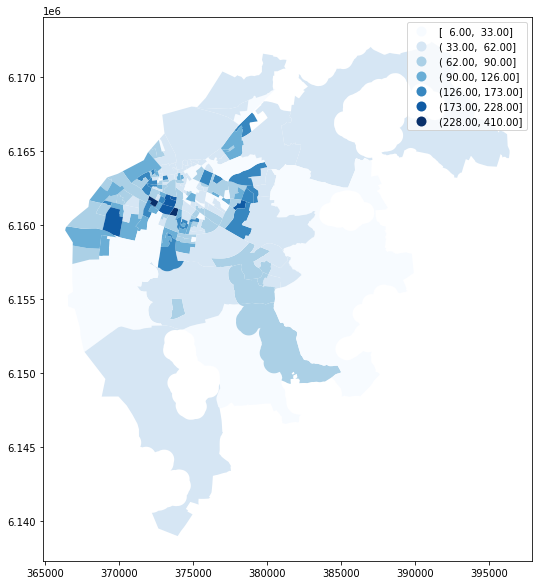

In [6]:
fig, ax = plt.subplots(figsize=(12,10))
malmo_mahalle.plot(column='Age80_w', cmap="Blues", scheme='FisherJenks', k=7, ax=ax, legend=True);

### Yüzdelik Gösterim (Verinin Normalizasyonu)

Veri setindeki sayısal değerleri doğrudan haritalamak yerine, toplam kümeye orantılandırarak da gösterimini sağlayabiliriz. 

Örneğin, mahallelerde yaşayan 80 yaş ve üstü kişi sayısını doğrudan görselleştirmek yerine; bu grubun toplam mahalle nüfusuna oranını yüzdelik cinsinden hesaplatıp da görselleştirmek olanaklıdır. 

In [7]:
malmo_mahalle["Age80_perc"] = (malmo_mahalle['Age80_w'] / malmo_mahalle["Total"])*100
malmo_mahalle["Age80_perc"]

0      19.931940
1       1.337920
2       7.193396
3       4.626866
4       1.659751
         ...    
197     1.081359
198     6.577225
199     0.809353
200     8.840864
201     2.761104
Name: Age80_perc, Length: 202, dtype: float64

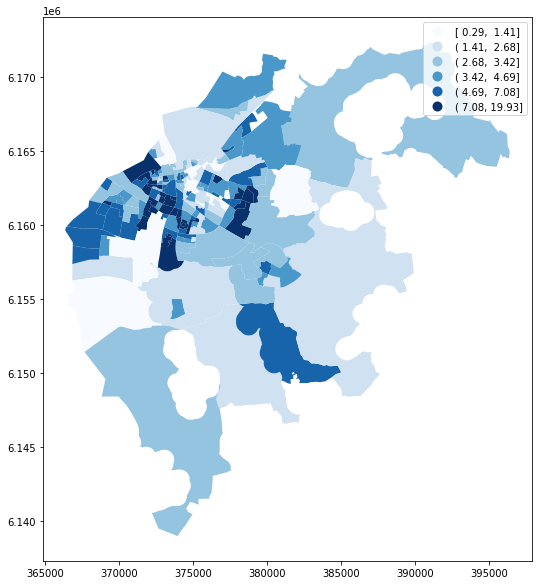

In [8]:
fig, ax = plt.subplots(figsize=(12,10))
malmo_mahalle.plot(column='Age80_perc', cmap="Blues", scheme="quantiles", k=6, ax=ax, legend=True);

Normalize edilmiş veri ile ham veriyi yan yana göstererek karşılaştırmakta fayda var. 

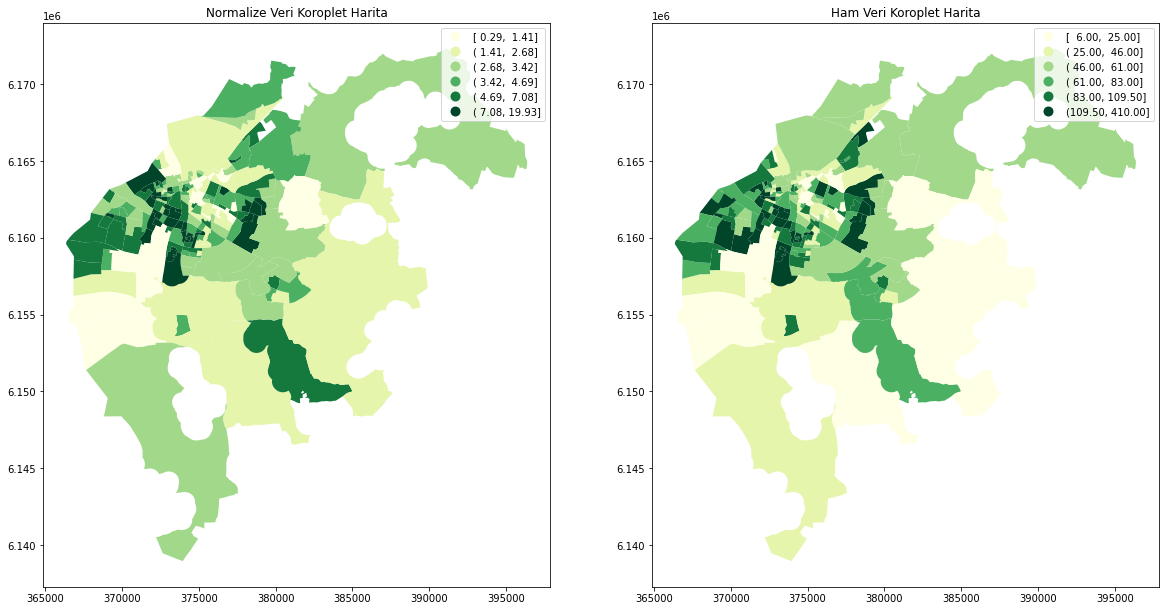

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(20,18))
malmo_mahalle.plot(column='Age80_perc', cmap="YlGn", scheme="quantiles", k=6, ax=ax[0], legend=True);
ax[0].set_title("Normalize Veri Koroplet Harita")
malmo_mahalle.plot(column='Age80_w', cmap="YlGn", scheme="quantiles", k=6, ax=ax[1], legend=True);
ax[1].set_title("Ham Veri Koroplet Harita")
plt.show()
